# Machine Learning Stock Predictions project

 To predict futrue stock prices using machine learnig we chose Historical stock prices from Yahoo Finanace. 
 we pulled Last 5 years Stock prices for fortune 500 companies. And we will be finding out the future stock prices for WMT i.e walmart.

In [1]:
#Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#read the CSV file
WMT_df = pd.read_csv('data/WMT.csv')

In [6]:
WMT_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,76.059998,76.250000,75.650002,76.080002,67.061386,4959300
1,2014-09-30,76.040001,76.720001,75.769997,76.470001,67.405151,5640700
2,2014-10-01,76.510002,76.860001,75.910004,76.120003,67.096642,6524900
3,2014-10-02,76.209999,76.910004,75.959999,76.230003,67.193604,4921200
4,2014-10-03,76.570000,77.480003,76.529999,77.320000,68.154404,5819700


In [7]:
WMT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [8]:
# Convert Date to datetime format 
WMT_df["Date"]=pd.to_datetime(WMT_df.Date,format='%Y-%m-%d')

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

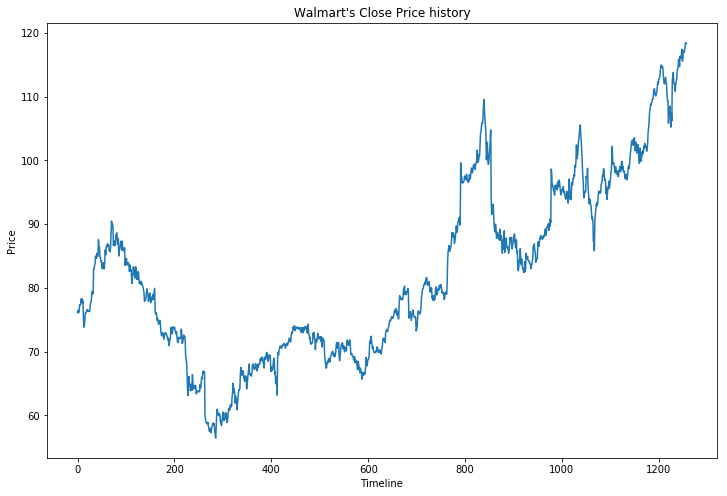

In [48]:
# Plot the line chart to see stock prices in last 5 years.
plt.figure(figsize=(12,8))
plt.xlabel('Timeline')
plt.ylabel('Price')
plt.title("Walmart's Close Price history")
plt.plot(df['Close'])

#### Predicitng Stock prices using Moving average 
Moving average is a technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration
while removing the oldest observed value from the set

In [19]:
# We need to convert Date column to index 
WMT_df.index = WMT_df['Date']

#create new dataframe with only required columns which Data and Closing price( target variable)
Sorted_StockPrices = WMT_df.sort_index(ascending=True, axis=0)
Mini_WMT_df = WMT_df[['Date', 'Close']].copy()
Mini_WMT_df.head()

,Date,Close
Date,,
2014-09-29,2014-09-29,76.080002
2014-09-30,2014-09-30,76.470001
2014-10-01,2014-10-01,76.120003
2014-10-02,2014-10-02,76.230003
2014-10-03,2014-10-03,77.320000


Now will have to split the data into training and testing datset. We will last 4 years data as a training Data and this years data from 2019 as testing data

In [21]:
WMT_Training_Data= Mini_WMT_df[:1072]
print("WMT_Training_Data shape:",WMT_Training_Data.shape)
WMT_Testing_Data = Mini_WMT_df[1072:]
print("WMT_Testing_Data shape", WMT_Testing_Data.shape)

WMT_Training_Data shape: (1072, 2)
WMT_Testing_Data shape (186, 2)


#### RMSE-Root Mean Square Error
It is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

In [29]:
len(WMT_Training_Data)-186+0

886

In [39]:
#Now we will create prdictions for the Test data set and check the RMSE value using the actual closing prices.
predictions=[]
for i in range(0,WMT_Testing_Data.shape[0]):
    mvg_avg_a=WMT_Training_Data['Close'][len(WMT_Training_Data)-186+i:].sum()+sum(predictions)
    mvg_avg_b= mvg_avg_a/185
    predictions.append(mvg_avg_b)

actualvsPred_DF=pd.DataFrame({"Actual":WMT_Testing_Data['Close'], "Predictions":predictions})
actualvsPred_DF

,Actual,Predictions
Date,,
2019-01-02,93.339996,91.627351
2019-01-03,92.860001,91.654040
2019-01-04,93.440002,91.683088
2019-01-07,94.540001,91.711375
2019-01-08,95.199997,91.742734
2019-01-09,94.889999,91.776857
2019-01-10,94.959999,91.807975
2019-01-11,94.839996,91.834829
2019-01-14,94.949997,91.856099


In [42]:
# checking the results (RMSE value)
WMT_rmse_mvgavg=np.sqrt(np.mean(np.power((np.array(WMT_Testing_Data['Close'])-predictions),2)))

print("Walmart's Moving Average RMSE:",WMT_rmse_mvgavg)

Walmart's Moving average RMSE: 12.330839504347894


C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


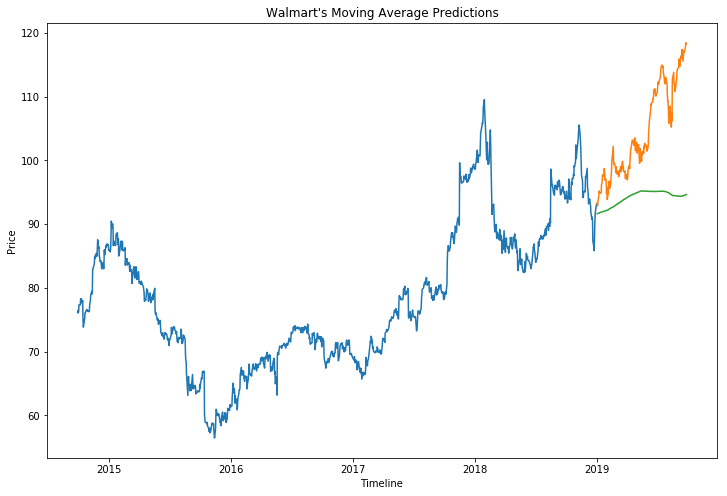

In [49]:
#Lets Plot these predctions along with actual price
WMT_Testing_Data['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.xlabel('Timeline')
plt.ylabel('Price')
plt.title("Walmart's Moving Average Predictions")

plt.plot(WMT_Training_Data['Close'])
plt.plot(WMT_Testing_Data[['Close', 'Predictions']])

### Linear Regression 

In [57]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [53]:
#We will have to convert Date to Unix timestamp 
Mini_WMT_df["Unix_date"]=pd.to_datetime(Mini_WMT_df['Date']).values.astype(np.int64)

Mini_WMT_df.head()

,Date,Close,Unix_date
Date,,,
2014-09-29,2014-09-29,76.080002,1411948800000000000
2014-09-30,2014-09-30,76.470001,1412035200000000000
2014-10-01,2014-10-01,76.120003,1412121600000000000
2014-10-02,2014-10-02,76.230003,1412208000000000000
2014-10-03,2014-10-03,77.320000,1412294400000000000


In [58]:
WMT_LR_trainingData=Mini_WMT_df[:1072]
WMT_LR_testingData=Mini_WMT_df[1072:]

In [59]:
print(WMT_LR_trainingData[:10])

                 Date      Close            Unix_date
Date                                                 
2014-09-29 2014-09-29  76.080002  1411948800000000000
2014-09-30 2014-09-30  76.470001  1412035200000000000
2014-10-01 2014-10-01  76.120003  1412121600000000000
2014-10-02 2014-10-02  76.230003  1412208000000000000
2014-10-03 2014-10-03  77.320000  1412294400000000000
2014-10-06 2014-10-06  77.349998  1412553600000000000
2014-10-07 2014-10-07  77.300003  1412640000000000000
2014-10-08 2014-10-08  78.239998  1412726400000000000
2014-10-09 2014-10-09  77.860001  1412812800000000000
2014-10-10 2014-10-10  78.290001  1412899200000000000


In [61]:
x_train=WMT_LR_trainingData[['Unix_date']].copy()
y_train=WMT_LR_trainingData[['Close']].copy()

x_test= WMT_LR_testingData[["Unix_date"]].copy()
y_test=WMT_LR_testingData[['Close']].copy()


In [63]:
model.fit(x_train, y_train)

predictions = model.predict(x_test)

rmse_LR = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(predictions)),2)))

print("Linear Regrassion RMSE value: ",rmse_LR)

Linear Regrassion RMSE value:  14.491557243860933


In [65]:
predictions

array([[89.58368985],
       [89.5979164 ],
       [89.61214294],
       [89.65482257],
       [89.66904912],
       [89.68327566],
       [89.6975022 ],
       [89.71172875],
       [89.75440838],
       [89.76863492],
       [89.78286147],
       [89.79708801],
       [89.81131456],
       [89.86822073],
       [89.88244727],
       [89.89667382],
       [89.91090036],
       [89.95357999],
       [89.96780654],
       [89.98203308],
       [89.99625963],
       [90.01048617],
       [90.0531658 ],
       [90.06739234],
       [90.08161889],
       [90.09584543],
       [90.11007198],
       [90.15275161],
       [90.16697815],
       [90.1812047 ],
       [90.19543124],
       [90.20965778],
       [90.26656396],
       [90.2807905 ],
       [90.29501705],
       [90.30924359],
       [90.35192322],
       [90.36614977],
       [90.38037631],
       [90.39460285],
       [90.4088294 ],
       [90.45150903],
       [90.46573557],
       [90.47996212],
       [90.49418866],
       [90

C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


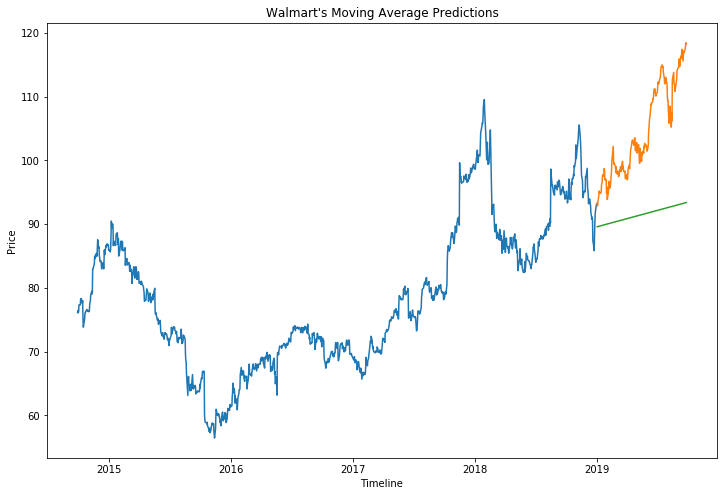

In [67]:
WMT_LR_testingData['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.xlabel('Timeline')
plt.ylabel('Price')
plt.title("Walmart's Stock price Predictions using Linear Regression")

plt.plot(WMT_LR_trainingData[['Close']])
plt.plot(WMT_LR_testingData[['Close', 'Predictions']])

### LSTM Model
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not

In [90]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [91]:
LSTM_DF=Mini_WMT_df.copy()

LSTM_DF.drop('Date', axis=1, inplace=True)
LSTM_DF.drop('Unix_date', axis=1, inplace=True)
LSTM_DF_dataset =LSTM_DF.values
LSTM_DF_dataset

array([[ 76.080002],
       [ 76.470001],
       [ 76.120003],
       ...,
       [118.400002],
       [118.470001],
       [118.300003]])

In [92]:
LTSM_train = LSTM_DF_dataset[0:1072,:]
LTSM_test = LSTM_DF_dataset[1072:,:]

In [93]:
#Convert the prices into scaled data 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(LSTM_DF_dataset)
scaled_data

array([[0.31684131],
       [0.32312654],
       [0.31748596],
       ...,
       [0.99887189],
       [1.        ],
       [0.99726031]])

In [94]:
x_train, y_train = [], []
for i in range(60,len(LTSM_train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [101]:
# create and fit the LSTM network
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
              
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 5, batch_size = 40)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
1012/1012 [==============================] - 6s 6ms/step - loss: 0.0370
Epoch 2/5
1012/1012 [==============================] - 3s 3ms/step - loss: 0.0058
Epoch 3/5
1012/1012 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 4/5
1012/1012 [==============================] - 3s 3ms/step - loss: 0.0039
Epoch 5/5
1012/1012 [==============================] - 3s 3ms/step - loss: 0.0038


In [102]:
# predicting Test data stock prices, using past 60 days stock prices from the train data
inputs = LSTM_DF[len(LSTM_DF) - len(LTSM_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
inputs

array([[0.60902497],
       [0.59452052],
       [0.61676071],
       [0.65527803],
       [0.63400487],
       [0.6043513 ],
       [0.61869457],
       [0.60273973],
       [0.63481061],
       [0.64689763],
       [0.64061238],
       [0.65640616],
       [0.65624495],
       [0.6668816 ],
       [0.66301367],
       [0.68912167],
       [0.68525386],
       [0.69911366],
       [0.7413376 ],
       [0.7068493 ],
       [0.71168416],
       [0.72393225],
       [0.74923455],
       [0.75600325],
       [0.77195809],
       [0.78098302],
       [0.79194194],
       [0.76470593],
       [0.749718  ],
       [0.72699434],
       [0.69492346],
       [0.66510882],
       [0.65044318],
       [0.60821925],
       [0.60838031],
       [0.62336822],
       [0.62417409],
       [0.62240131],
       [0.66140208],
       [0.65866239],
       [0.66446417],
       [0.68219178],
       [0.63481061],
       [0.61804991],
       [0.59258666],
       [0.60467369],
       [0.60322318],
       [0.591

In [103]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = regressor.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
X_test

In [108]:
LSTM_rmse=np.sqrt(np.mean(np.power((LTSM_test-closing_price),2)))
LSTM_rmse

1.20648045565731

In [106]:
closing_price

array([[ 92.884895],
       [ 93.34196 ],
       [ 93.110916],
       [ 93.24126 ],
       [ 93.9908  ],
       [ 94.77725 ],
       [ 94.899506],
       [ 94.89248 ],
       [ 94.77904 ],
       [ 94.77862 ],
       [ 95.601524],
       [ 96.09631 ],
       [ 96.49554 ],
       [ 97.253586],
       [ 97.42137 ],
       [ 98.177635],
       [ 98.29099 ],
       [ 97.327675],
       [ 96.89072 ],
       [ 96.55652 ],
       [ 95.25282 ],
       [ 95.29021 ],
       [ 94.25898 ],
       [ 94.31403 ],
       [ 95.00118 ],
       [ 95.40588 ],
       [ 96.2255  ],
       [ 95.8663  ],
       [ 95.95532 ],
       [ 96.510345],
       [ 97.39741 ],
       [ 98.14894 ],
       [ 99.3562  ],
       [101.29648 ],
       [100.53414 ],
       [ 99.56656 ],
       [ 99.24307 ],
       [ 98.9119  ],
       [ 98.52525 ],
       [ 98.01766 ],
       [ 98.39587 ],
       [ 97.97979 ],
       [ 97.693275],
       [ 97.917206],
       [ 98.0216  ],
       [ 97.535965],
       [ 97.37    ],
       [ 97.9

C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


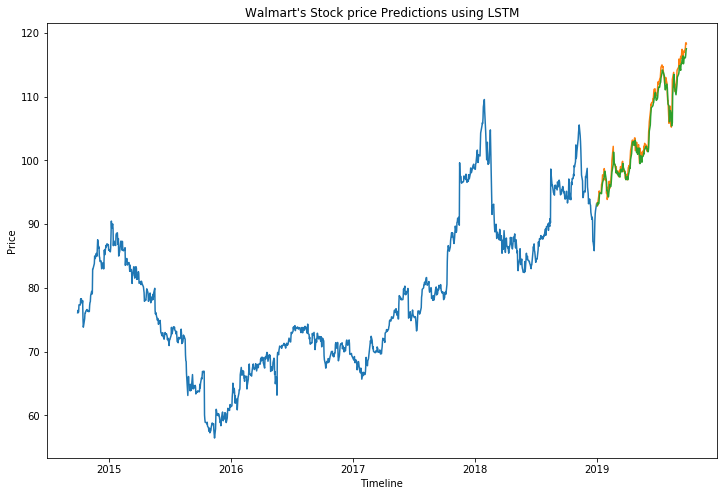

In [111]:
#for plotting
LTSM_train = LSTM_DF[:1072]
LTSM_Test = LSTM_DF[1072:]
LTSM_Test['Predictions'] = closing_price

plt.figure(figsize=(12,8))
plt.xlabel('Timeline')
plt.ylabel('Price')

plt.title("Walmart's Stock price Predictions using LSTM")
plt.plot(LTSM_train['Close'])
plt.plot(LTSM_Test[['Close','Predictions']])